# *1. Antecedentes*

Una cadena de supermercado ha generado varios tipos de campaña (acumulación de puntos en una tarjeta de membresía, descuentos en fechas especiales, etc) y no le han resultado tan bien como esperaba.

Por tanto, quiere determinar como lograr que las campañas funcionen mejor para grupos específicos de clientes y logre aumentar sus beneficios.




# *2. Objetivo del proyecto*

Crear un clasificador binario para predecir si un cliente responde o no a la campaña

# *3. Librerías*

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Lectura del archivo

In [ ]:
#Luis
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mounted at /`content`/drive

# *4. Descripción de Features*

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/CoderHouse/marketing_campaign.xlsx")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

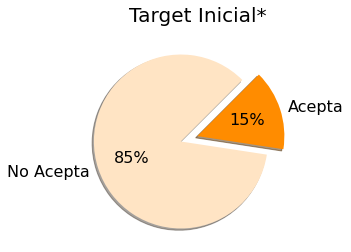

['No Acepta', 'Acepta']
[1906  334]


In [ ]:
labels=[]
for i in df.Response.value_counts().index:
  if i==0:
    labels.append('No Acepta')
  elif i ==1:
    labels.append('Acepta')


sizes=df.Response.value_counts().values
explode = (0.2, 0)
colors = ['bisque','darkorange']
plt.pie(sizes, explode=explode, labels=labels, autopct='%.0f%%',shadow=True, startangle=45, textprops = {'color': 'black','fontsize':16}, colors=colors)
plt.title('Target Inicial*', fontsize='20')

plt.show()
print(labels)
print(sizes)

###4.1 Limpieza de Datos

In [ ]:
# Descripcion Dataset Inicial
print('Casos: ',df.shape[0])
print('Features: ',df.shape[1])

Casos:  2240
Features:  29


In [ ]:
# Revisión de Nan
## Income presenta valores Nan
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Se eliminan casos Nan en Income**

In [ ]:
# Casos con Valor Nan
df[df.Income.isna()].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
# Elimina casos Nan: 24 casos
df2=df.dropna()
len(df2)

2216

In [ ]:
# Luego de eliminar Nan
print('Casos: ',df2.shape[0])
print('Features: ',df2.shape[1])

Casos:  2216
Features:  29


In [ ]:
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


**Revisión Frecuencia de casos**

In [ ]:
col_tot=df2.columns

for i in col_tot:
  print(i)
  print(df2[i].value_counts())
  print()

ID
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
7235    1
3560    1
5278    1
7761    1
9405    1
Name: ID, Length: 2216, dtype: int64

Year_Birth
1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1958    52
1977    52
1952    52
1968    51
1966    50
1959    50
1954    49
1960    49
1955    48
1982    44
1963    44
1962    44
1967    44
1951    42
1983    41
1986    41
1957    41
1964    41
1980    39
1981    38
1984    38
1961    35
1953    35
1985    32
1949    30
1989    29
1988    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     6
1995     5
1993     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Marital_Status
Marrie

**Elimina features con valores contantes**

In [ ]:
print(df2.Z_CostContact.value_counts())

print(df2.Z_Revenue.value_counts())

3    2216
Name: Z_CostContact, dtype: int64
11    2216
Name: Z_Revenue, dtype: int64


In [ ]:
df2=df2.drop(['Z_CostContact','Z_Revenue'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

### 4.2 Target

Response(target) :  
</p> Target= 1, el cliente aceptó la oferta en la última campaña.
</p> Target= 0 en caso contrario.

In [ ]:
def categoria(x):
  if x==1:
    return 'Acepta'
  if x==0:
    return 'No acepta'

df_target=df2[['Response']]

df_target['Etiqueta_Target']=df2['Response'].apply(lambda x: categoria(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


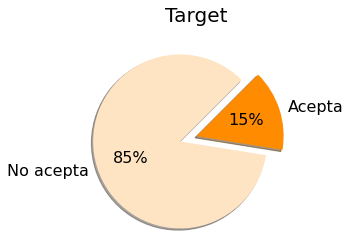

Casos: 
 No acepta    1883
Acepta        333
Name: Etiqueta_Target, dtype: int64


In [ ]:
# Resultados del Target Filtrado
labels=df_target.Etiqueta_Target.value_counts().index
sizes=df_target.Etiqueta_Target.value_counts().values
explode = (0.2, 0)
colors = ['bisque','darkorange']
plt.pie(sizes, explode=explode, labels=labels, autopct='%.0f%%',shadow=True, startangle=45, textprops = {'color': 'black','fontsize':16}, colors=colors)
plt.title('Target', fontsize='20')
plt.show()
print('Casos: \n',df_target.Etiqueta_Target.value_counts())

### 4.3 Variables del cliente

ID: Número identificador del cliente

Year_Birth : Año de nacimiento del cliente

Education : nivel de educación del cliente Civil

Marital_Status : estado civil del cliente

Income : ingreso anual del hogar del cliente

Kidhome : número de niños pequeños en el hogar del cliente

Teenhome : número de adolescentes en el hogar del cliente

DtCustomer : fecha de inscripción del cliente en la empresa

####4.3a Edad

Supuesto: Las respuestas ante una oferta cambian de acuerdo a la edad del cliente, por tanto, es necesario analizar el comportamiento, intereses y prioridades de los consumidores por esta característica.

Grupos de edad:

- Menor a 18
- 18-24
- 25-39
- 40-55
- 56 a más

In [ ]:
# Calculo de Edad
def CalculoEdad(x):
  return 2022-int(x)

df2.loc[:,['edad']] =df2.Year_Birth.apply(lambda x: CalculoEdad(x))

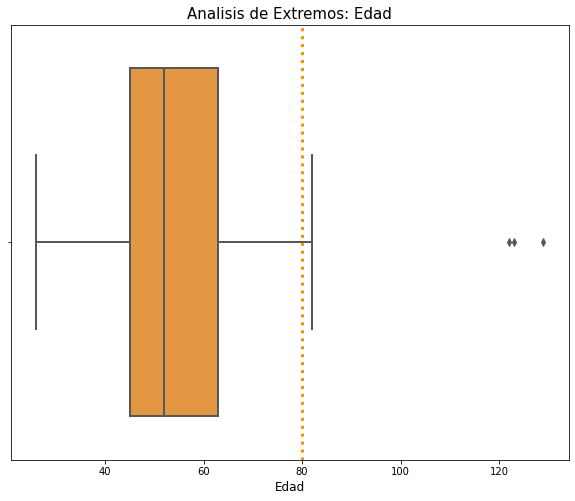

In [ ]:
plt.figure(figsize=(10,8))

ax = sns.boxplot(x=df2.edad,palette="YlOrBr",linewidth=2)
limite_edad=80
plt.axvline(limite_edad, color='darkorange', linestyle='dotted', linewidth=3, label='limite edad')

plt.title('Analisis de Extremos: Edad', fontsize=15)
plt.xlabel('Edad',fontsize=12)
plt.show()

**Listado de casos con más de 80 años**

In [ ]:
df2.loc[df2['edad']>80,:]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,edad
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,1,0,122
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,2,4,0,0,0,0,0,0,0,129
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,123
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,5,2,0,0,1,0,0,0,0,81
1950,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,4,5,0,0,0,0,0,0,0,82


**Se eliminan casos con edad mayor a 80 años porque no es un publico objetivo**

In [ ]:
df2_idx=df2[df2["edad"]>80].index
df2=df2.drop(df2_idx)

df2.edad.max()

79

In [ ]:
# Nuevo df con datos filtrados de edad
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,edad
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,38
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,41


In [ ]:
# Grupos de Edad
def grupo_edad(x):
  if x<18:
    return "Menor a 18"  
  elif x>=18 and x<=24:
    return "18-24"
  elif x>=25 and x<=39:
    return "25-39"
  elif x>=40 and x<=55:
    return "40-55"
  elif x>=56:
    return "56+"
  else:
    return "Otro caso"

df2.loc[:,['GrupoEdad']] = df2.edad.apply(lambda x: grupo_edad(x))

####4.3b Dt_Customer
</p> Se da formato fecha
</p> Se calcula número de años como cliente

In [ ]:
# Conversion de Dt_Customer a formato fecha
df2['Dt_Customer']=pd.to_datetime(df2['Dt_Customer'], format='%Y-%m-%d')

In [ ]:
#TiempoCliente: Aproximado del número de años como cliente
df2['TiempoCliente'] =2022-df2['Dt_Customer'].dt.year
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,edad,GrupoEdad,TiempoCliente
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,1,65,56+,10
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,0,68,56+,8
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,57,56+,9
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,0,38,25-39,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,0,41,40-55,8


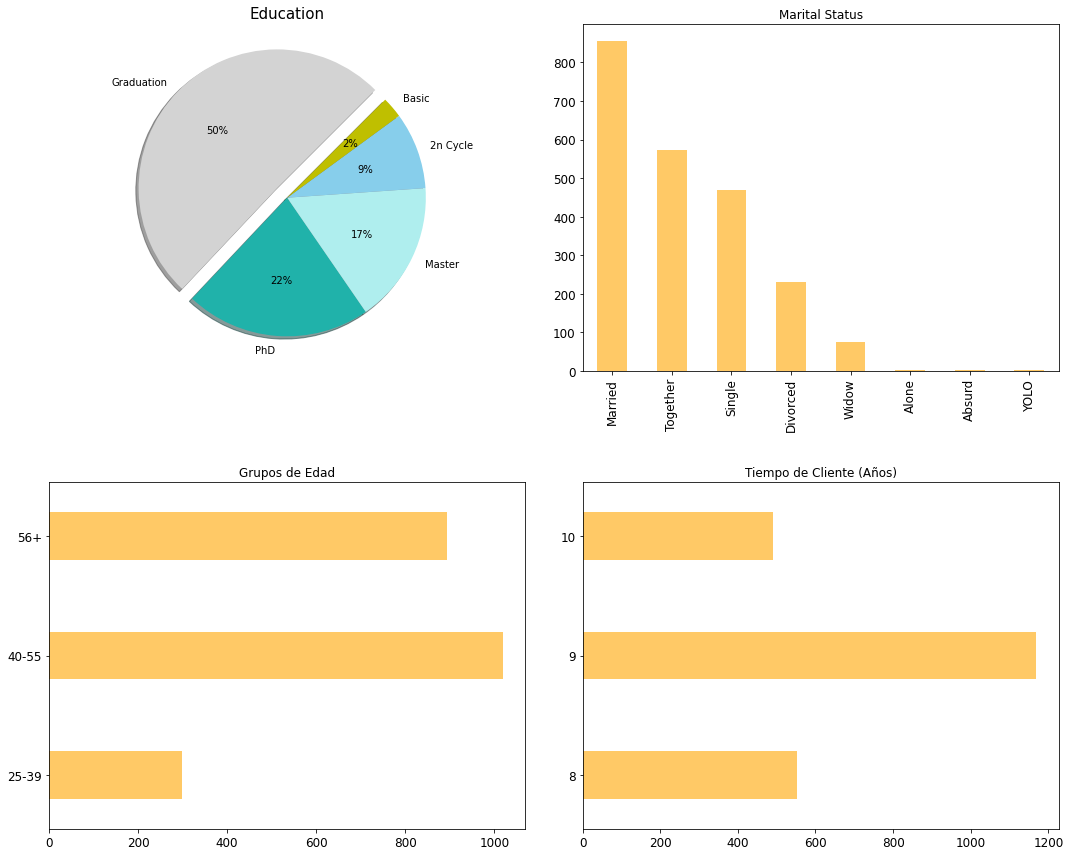

In [ ]:
plt.subplots(figsize=(15, 12))

labels=df2.Education.value_counts().index
sizes=df2.Education.value_counts().values
explode = (0.1, 0, 0, 0,0)

colors = ['lightgray','lightseagreen','paleturquoise','skyblue','y','#ffcc99']

plt.subplot(2,2,1)
ax1=plt.pie(sizes, explode=explode, labels=labels, autopct='%.0f%%',shadow=True, startangle=45, colors=colors)
plt.title('Education',fontsize=15)

plt.subplot(2,2,2)
ax2=df2.Marital_Status.value_counts().plot(kind='bar', title='Marital Status',color ='orange',width = 0.5,alpha=0.6,fontsize=12)

plt.subplot(2,2,3)
ax3=df2.GrupoEdad.value_counts().sort_index().plot(kind='barh', title='Grupos de Edad',color ='orange',width = 0.4,alpha=0.6,fontsize=12)

plt.subplot(2,2,4)
ax4=df2.TiempoCliente.value_counts().sort_index().plot(kind='barh', title='Tiempo de Cliente (Años)',color ='orange',width = 0.4,alpha=0.6,fontsize=12)
plt.tight_layout(w_pad=3.5,h_pad=3.5)
plt.show()

####4.3c Income

In [ ]:
df2[['Income']].describe()

,Income
count,2211.000000
mean,52218.628223
std,25175.027907
min,1730.000000
25%,35221.000000
50%,51373.000000
75%,68487.000000
max,666666.000000


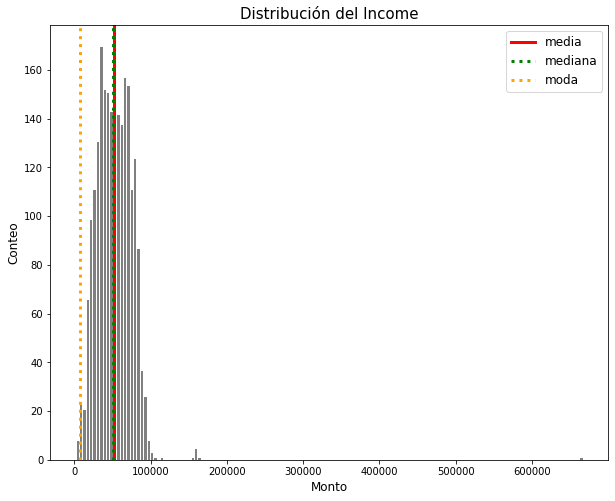

In [ ]:
from scipy import stats

media=df2.Income.values.mean()
mediana=np.median(df2.Income.values)
moda=stats.mode(df2.Income.values)

plt.subplots(figsize=(10, 8))

plt.hist(df2.Income.values, bins=150, edgecolor='white', color='gray')

plt.ylabel('Conteo',fontsize=12)
plt.xlabel('Monto',fontsize=12)
plt.axvline(media, color='red', linestyle='solid', linewidth=3, label='media')
plt.axvline(mediana, color='green', linestyle='dotted', linewidth=3, label='mediana')
plt.axvline(moda[0],color='orange',linestyle='dotted',linewidth=3, label='moda')
plt.title('Distribución del Income',fontsize=15)
plt.legend(fontsize=12)

plt.grid(False)

plt.show()

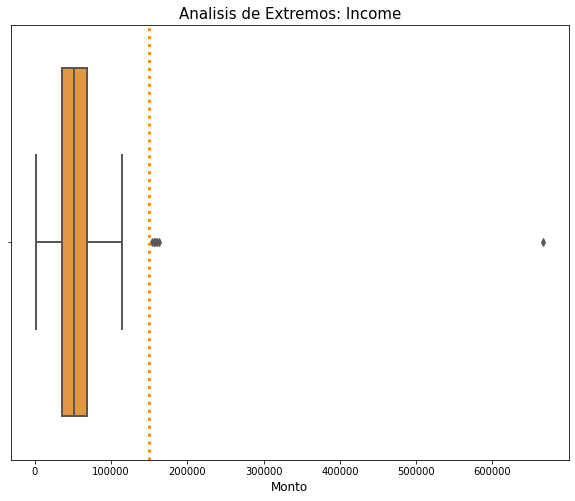

In [ ]:
plt.figure(figsize=(10,8))

ax = sns.boxplot(x=df2.Income,palette="YlOrBr",linewidth=2)
limite_income=150000
plt.axvline(limite_income, color='darkorange', linestyle='dotted', linewidth=3, label='limite edad')

plt.title('Analisis de Extremos: Income', fontsize=15)
plt.xlabel('Monto',fontsize=12)
plt.show()

In [ ]:
df2.loc[df2['Income']>limite_income,:]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,edad,GrupoEdad,TiempoCliente
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,49,40-55,8
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,0,0,0,46,40-55,9
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,47,40-55,8
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,40,40-55,10
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,0,0,0,51,40-55,9
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,0,0,0,45,40-55,9
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,73,56+,9
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,0,0,45,40-55,9


**Se eliminan casos con Income>150000 porque no es un publico objetivo**

In [ ]:
df2_idx=df2[df2["Income"]>limite_income].index
df2=df2.drop(df2_idx)

df2.Income.max()

113734.0

In [ ]:
df_income=df2[['GrupoEdad','Income','Response']]

def categoria(x):
  if x==1:
    return 'Acepta'
  if x==0:
    return 'No acepta'

df_income['Etiqueta_Target']=df_income['Response'].apply(lambda x: categoria(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


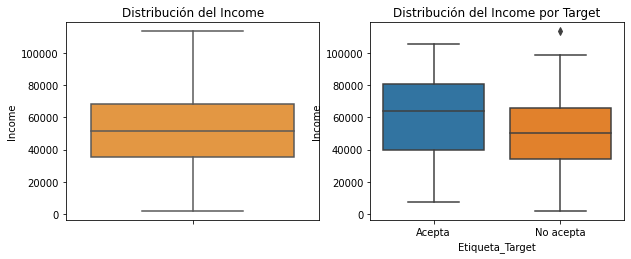

In [ ]:
plt.subplots(figsize=(10, 8))
plt.subplot(2,2,1)

sns.boxplot(data=df_income, y='Income', palette='YlOrBr')
plt.title('Distribución del Income')

plt.subplot(2,2,2)
sns.boxplot(data=df_income, x='Etiqueta_Target', y='Income')
plt.title('Distribución del Income por Target')
plt.show()

<Figure size 864x720 with 0 Axes>

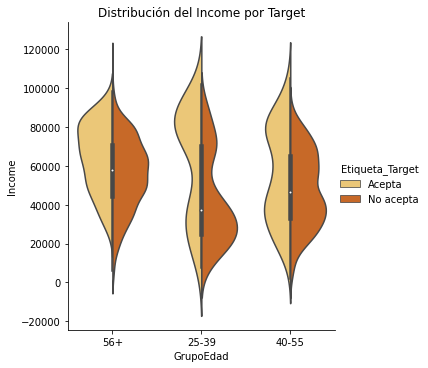

In [ ]:
plt.figure(figsize=(12,10))
sns.catplot(data=df_income, kind='violin', x='GrupoEdad', y='Income', hue='Etiqueta_Target', split='True', palette="YlOrBr")
plt.title('Distribución del Income por Target', fontsize=12)
plt.show()

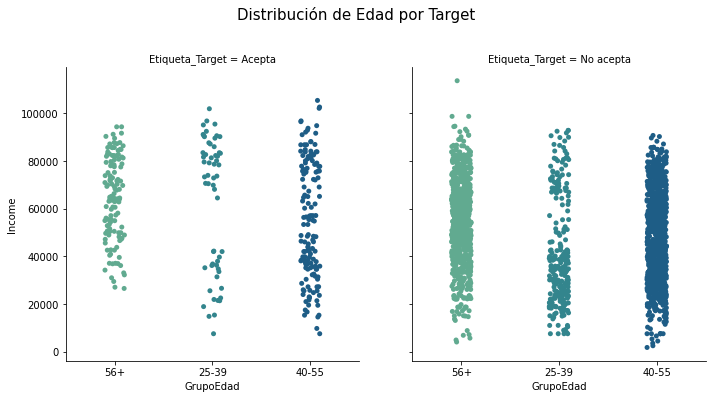

In [ ]:
sns.catplot(x="GrupoEdad", y="Income",col="Etiqueta_Target", data=df_income, palette='crest',sharey=True)
plt.suptitle('Distribución de Edad por Target',y=1.1,fontsize=15)
plt.tight_layout(w_pad=5)
plt.show()

####4.3d Otros: Kidhome,Teenhome

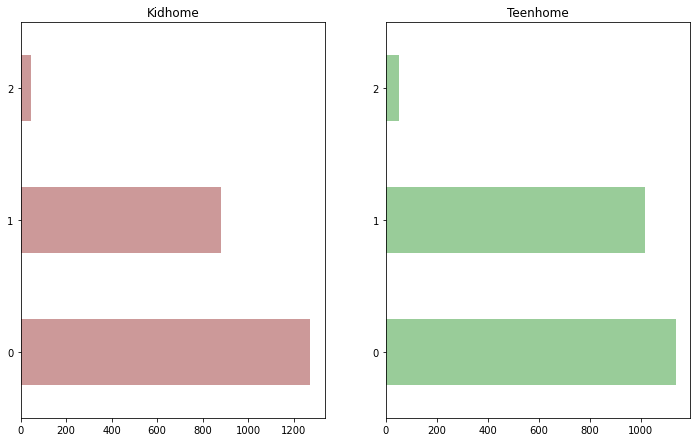

In [ ]:
plt.subplots(figsize=(12, 16))

plt.subplot(2,2,1)

ax2=df2.Kidhome.value_counts().plot(kind='barh', title='Kidhome',color ='maroon',width = 0.5, alpha=0.4)

plt.subplot(2,2,2)
ax3=df2.Teenhome.value_counts().plot(kind='barh', title='Teenhome',color ='green',width = 0.5,alpha=0.4)

plt.show()

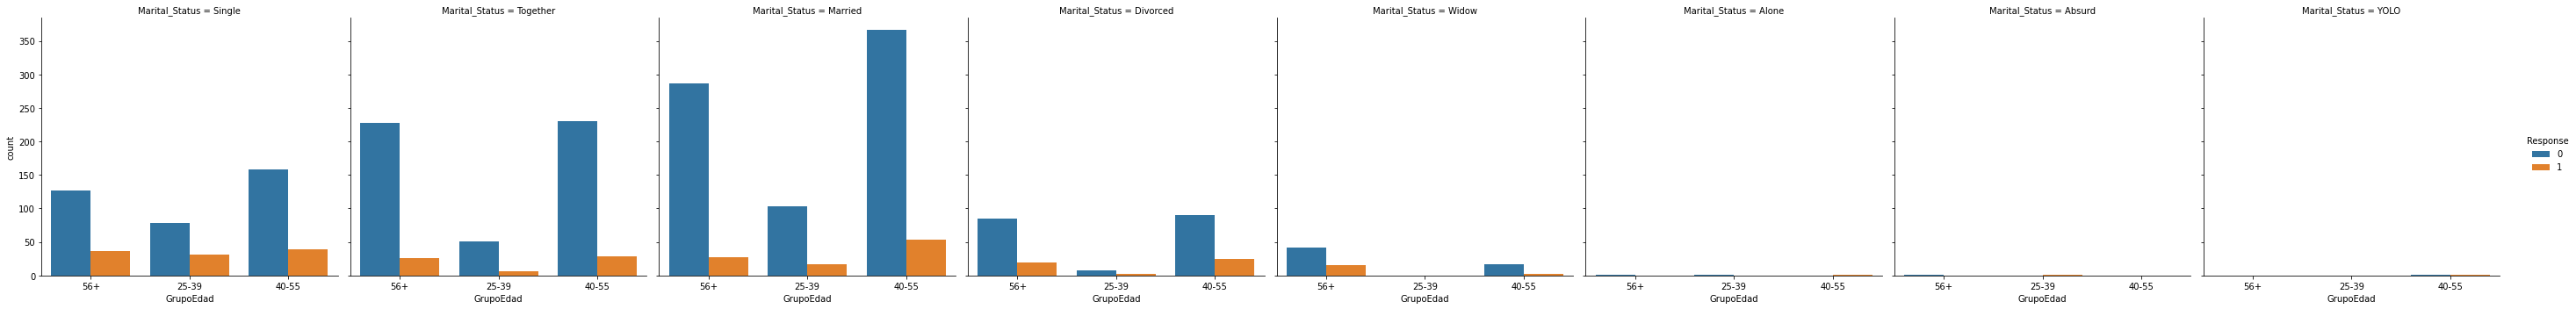

In [ ]:
# Cantidad respuesta de la ultima campaña (Response) por edad diferenciando el estado civil (Marital_Status)
sns.catplot(data=df2[['GrupoEdad','Response','Marital_Status']], x='GrupoEdad',hue='Response',col='Marital_Status',kind='count')

###4.2 Variables de Gasto

MntWines : cantidad gastada en productos de vino en los últimos 2 años

MntFruits : cantidad gastado en productos de frutas en los últimos 2 años

MntMeatProducts : cantidad gastada en productos cárnicos en los últimos 2 años

MntFishProducts : cantidad gastada en productos pesqueros en los últimos 2 años

MntSweetProducts : cantidad gastada en productos dulces en los últimos 2 años.

MntGoldProds : cantidad gastada en productos premium en los últimos 2 años.

In [ ]:
cols_productos=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df_productos=df2[cols_productos]
df_productos.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000
mean,305.793917,26.408080,165.133908,37.765774,27.152973,44.084884
std,336.984201,39.797182,217.540888,54.842393,41.141012,51.751007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000
75%,506.000000,33.000000,232.000000,50.000000,34.000000,56.500000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


In [ ]:
df_productos['Etiqueta_Target']=df2['Response'].apply(lambda x: categoria(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


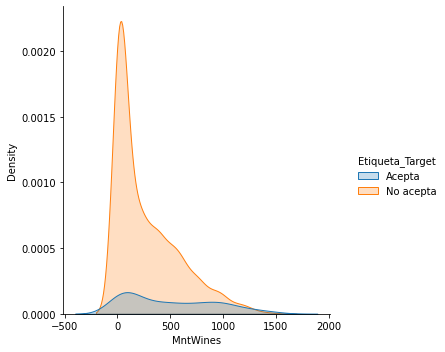

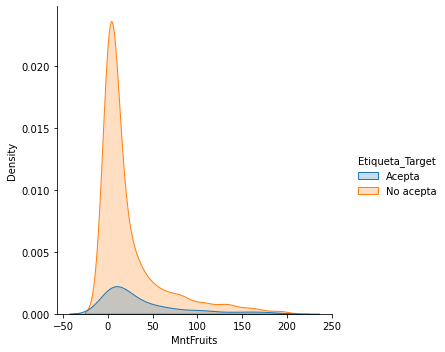

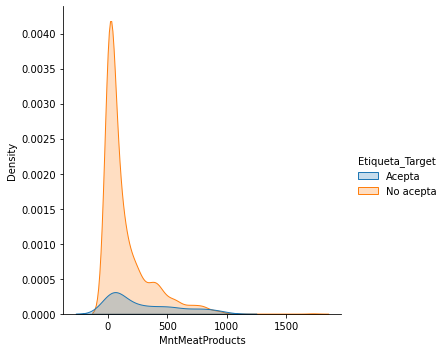

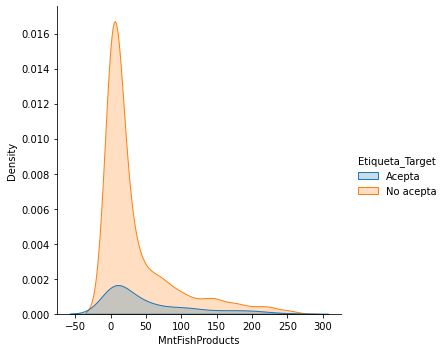

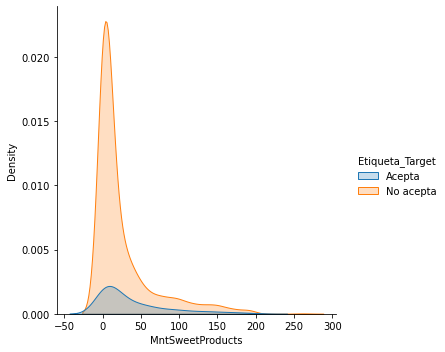

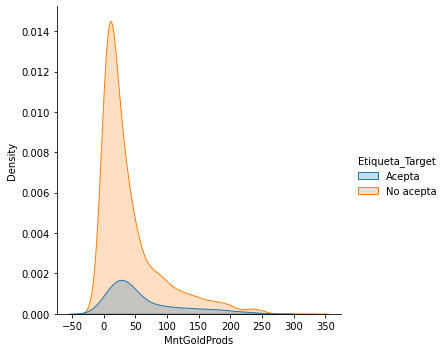

In [ ]:
for i in cols_productos:
  sns.displot(data=df_productos, x=i,hue='Etiqueta_Target', kind='kde', fill='True').set_titles(i)
  
plt.show()

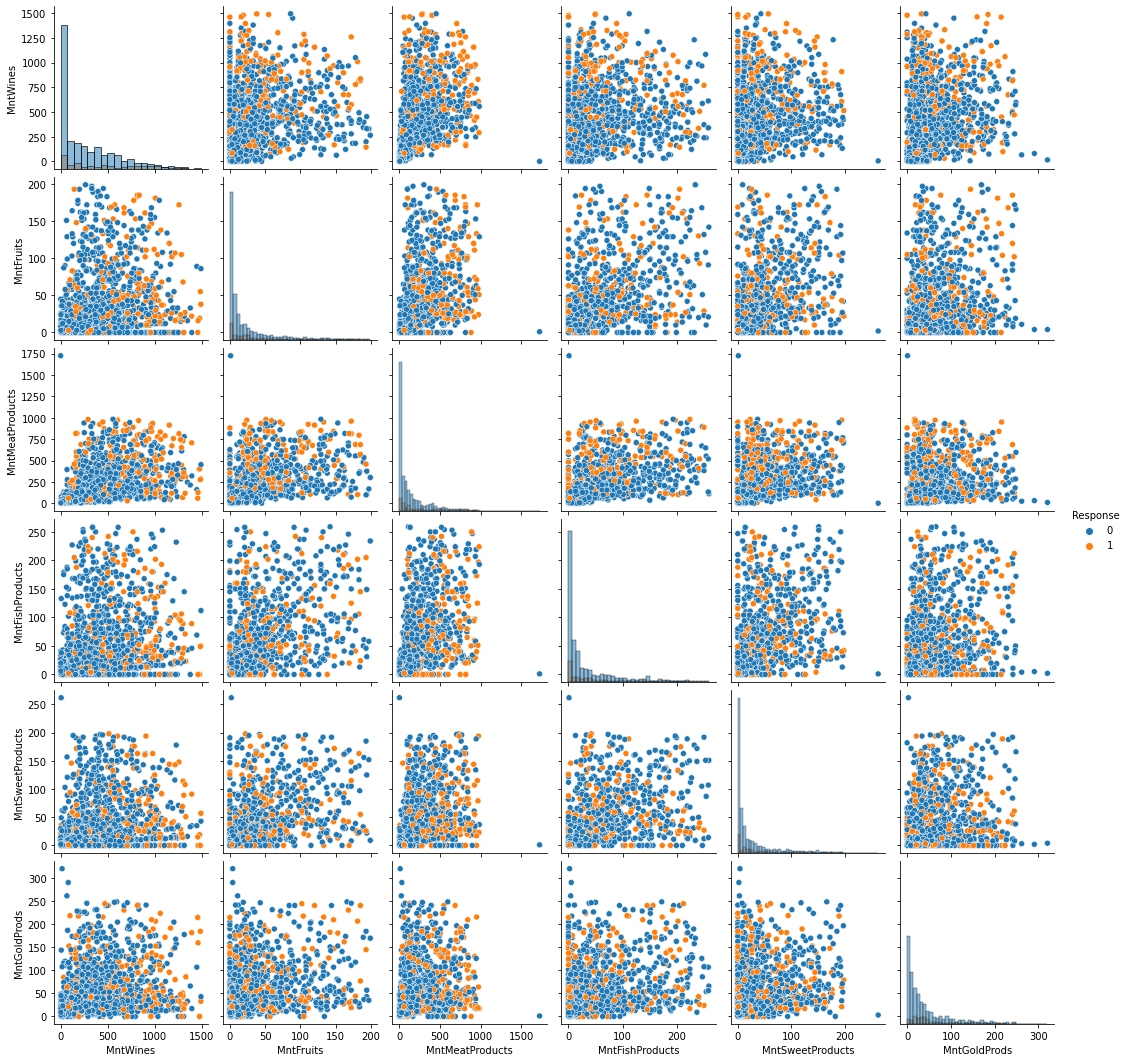

In [ ]:
sns.pairplot(df2[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Response']], hue = "Response", diag_kind='hist')

In [ ]:
df2[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Response']].corr()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Response
MntWines,1.000000,0.385094,0.591722,0.396232,0.390180,0.391454,0.246526
MntFruits,0.385094,1.000000,0.568402,0.592450,0.571095,0.392573,0.122306
MntMeatProducts,0.591722,0.568402,1.000000,0.596100,0.558038,0.376505,0.249579
MntFishProducts,0.396232,0.592450,0.596100,1.000000,0.583053,0.425381,0.107356
MntSweetProducts,0.390180,0.571095,0.558038,0.583053,1.000000,0.355523,0.115105
MntGoldProds,0.391454,0.392573,0.376505,0.425381,0.355523,1.000000,0.140018
Response,0.246526,0.122306,0.249579,0.107356,0.115105,0.140018,1.000000


In [ ]:
corr_gasto=df2[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Response']].corr()

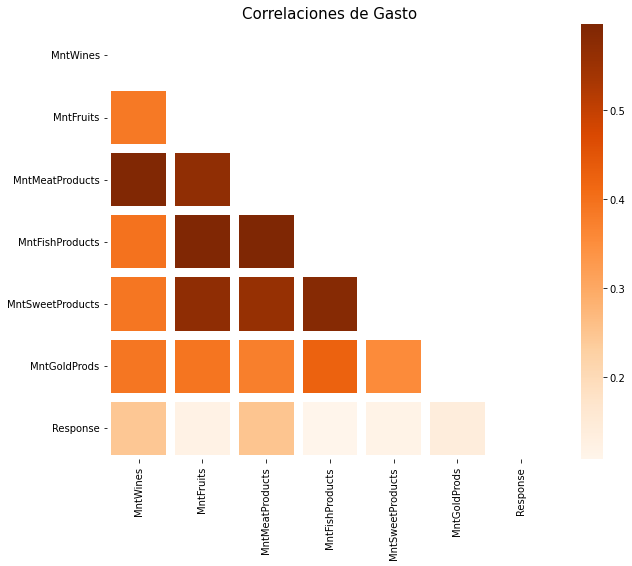

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

upp_mat_gasto = np.triu(corr_gasto)

sns.heatmap(corr_gasto,cmap = 'Oranges', mask = upp_mat_gasto,linewidth=8 )
plt.title('Correlaciones de Gasto', fontsize=15)
plt.show()

In [ ]:
df2['Total_gasto']=df2[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,edad,GrupoEdad,TiempoCliente,Total_gasto
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,65,56+,10,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,68,56+,8,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,57,56+,9,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,38,25-39,8,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,41,40-55,8,422


### 4.4 Variables de Compras
Recency : número de días desde la última compra

NumDealsPurchases : número de compras hecho con descuento

NumWebPurchases : número de compras realizadas a través del sitio web de la empresa

NumCatalogPurchases : número de compras hechas usando el catálogo

NumStorePurchases : número de compras realizadas directamente en las tiendas

In [ ]:
cols_compras=['Recency','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Response']
df_compras=df2[cols_compras]
df_compras.describe()

,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000
mean,48.975034,2.320018,4.099864,2.642760,5.824784,0.151158
std,28.921749,1.886106,2.737869,2.795306,3.242988,0.358284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1.000000,2.000000,0.000000,3.000000,0.000000
50%,49.000000,2.000000,4.000000,2.000000,5.000000,0.000000
75%,74.000000,3.000000,6.000000,4.000000,8.000000,0.000000
max,99.000000,15.000000,27.000000,28.000000,13.000000,1.000000


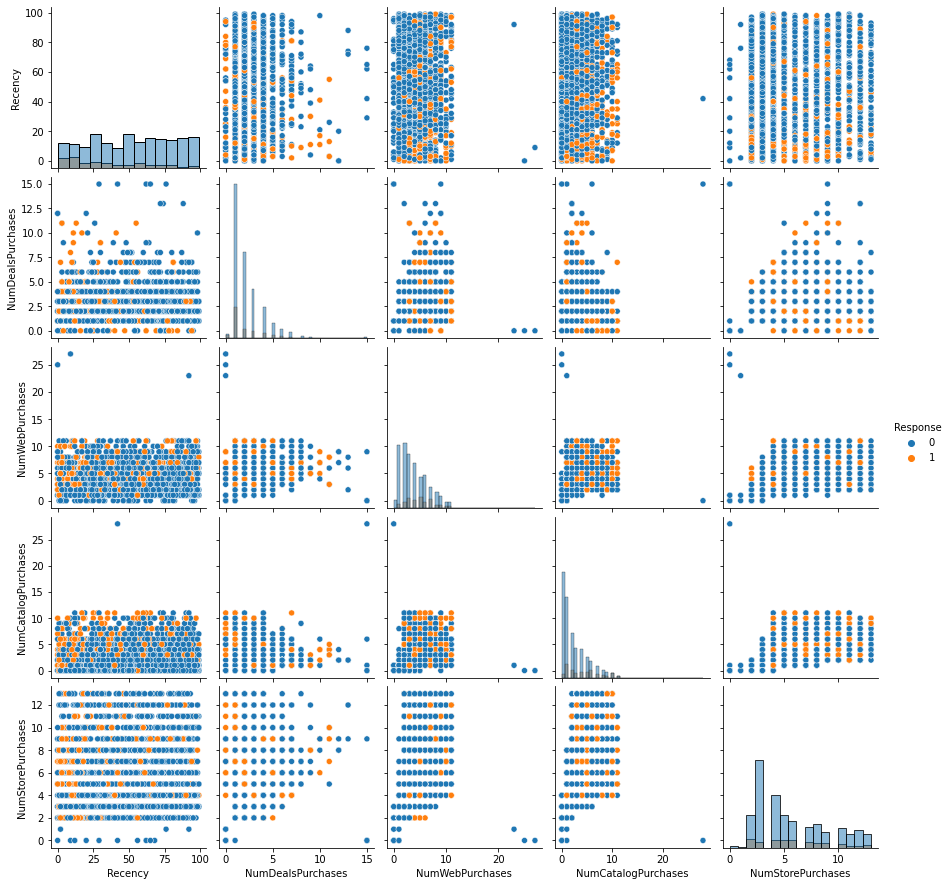

In [ ]:
sns.pairplot(df2[['Recency','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Response']], hue = "Response",diag_kind='hist')

In [ ]:
df2[['Recency','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Response']].corr()

,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response
Recency,1.000000,0.001537,-0.005279,0.029100,0.000989,-0.200095
NumDealsPurchases,0.001537,1.000000,0.253154,-0.057466,0.072429,0.004324
NumWebPurchases,-0.005279,0.253154,1.000000,0.420334,0.512322,0.149881
NumCatalogPurchases,0.029100,-0.057466,0.420334,1.000000,0.562389,0.235321
NumStorePurchases,0.000989,0.072429,0.512322,0.562389,1.000000,0.033358
Response,-0.200095,0.004324,0.149881,0.235321,0.033358,1.000000


In [ ]:
corr_compras=df2[['Recency','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Response']].corr()

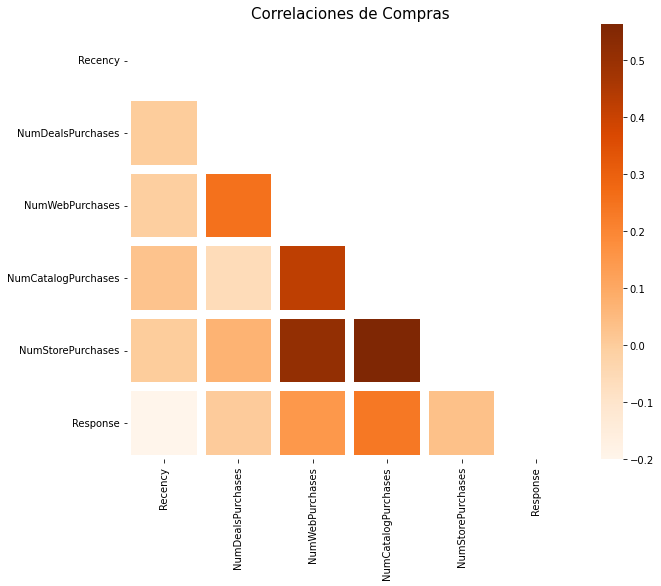

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

upp_mat_compras = np.triu(corr_compras)

sns.heatmap(corr_compras,cmap = 'Oranges', mask = upp_mat_compras,linewidth=8)
plt.title('Correlaciones de Compras', fontsize=15)
plt.show()

### 4.5 Variables de Oferta
AcceptedCmp1 : 1 si el cliente aceptó la oferta en la 1.ª campaña, 0 en caso contrario

AcceptedCmp2 : 1 si el cliente aceptó la oferta en la 2.ª campaña, 0 en caso contrario

AcceptedCmp3 : 1 si el cliente aceptó la oferta en la 3.ª campaña, 0 en caso contrario

AcceptedCmp4 : 1 si el cliente aceptó la oferta en la 4.ª campaña, 0 en caso contrario

AcceptedCmp5 : 1 si el cliente aceptó la oferta en la 5.ª campaña, 0 en caso contrario

In [ ]:
# Calculo de Número de Ofertas que fue aceptada en las últimas 5 campañas
df2['NumOfertas']=df2[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',]].sum(axis=1)

print('Número de Ofertas Aceptadas')
print(df2['NumOfertas'].value_counts())

Número de Ofertas Aceptadas
0    1746
1     321
2      81
3      44
4      11
Name: NumOfertas, dtype: int64


In [ ]:
cols_ofertas=['NumOfertas','Income','Response']
df_ofertas=df2[cols_ofertas]

df_ofertas['Etiqueta_Target']=df2['Response'].apply(lambda x: categoria(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**Resultados porcentuales Total: Alguna Oferta**
<br>
</p> Solo el 14.6% acepto una oferta en las últimas cinco campañas

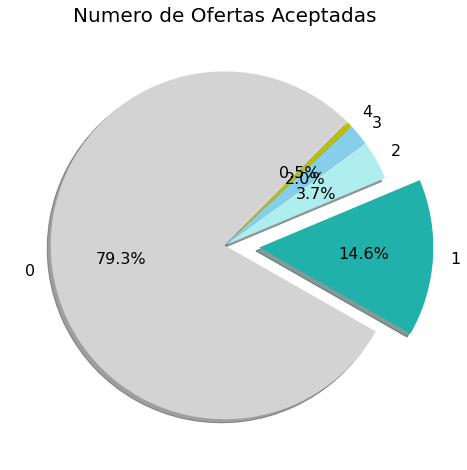

In [ ]:
plt.subplots(figsize=(12, 8))

labels=df_ofertas.NumOfertas.value_counts().index
sizes=df_ofertas.NumOfertas.value_counts().values
explode = (0, 0.2, 0,0, 0)
colors = ['lightgray','lightseagreen','paleturquoise','skyblue','y','#ffcc99']
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%',shadow=True, startangle=45, textprops = {'color': 'black','fontsize':16}, colors=colors)
plt.title('Numero de Ofertas Aceptadas', fontsize='20')
plt.show()

In [ ]:
df_ofertas['Alguna_Oferta']=df_ofertas['NumOfertas'].apply(lambda x: "Acepta Oferta en Ult. 5C" if x>0 else "No Acepto Ninguna")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_ofertas.Alguna_Oferta.value_counts()

No Acepto Ninguna           1746
Acepta Oferta en Ult. 5C     457
Name: Alguna_Oferta, dtype: int64

**Resultados porcentuales Casos: Alguna Oferta Vs Target (Oferta ultima campaña)**
<br>
</p> 

In [ ]:
pd.crosstab(df_ofertas.Etiqueta_Target,df_ofertas.Alguna_Oferta, margins=True,margins_name = "Total")

Alguna_Oferta,Acepta Oferta en Ult. 5C,No Acepto Ninguna,Total
Etiqueta_Target,,,
Acepta,187,146,333
No acepta,270,1600,1870
Total,457,1746,2203


**Resultados porcentuales Total: Alguna Oferta Vs Target (Oferta ultima campaña)**
<br>
</p> Solo el 15.1% acepto una oferta en las última campaña y solo el 20.7% en las últimas cinco campañas. 

In [ ]:
pd.crosstab(index=df_ofertas['Etiqueta_Target'], columns=df_ofertas['Alguna_Oferta'],margins=True,margins_name = "Total").apply(lambda r: r/len(df_ofertas) *100,axis=1)

Alguna_Oferta,Acepta Oferta en Ult. 5C,No Acepto Ninguna,Total
Etiqueta_Target,,,
Acepta,8.488425,6.627326,15.115751
No acepta,12.256015,72.628234,84.884249
Total,20.744439,79.255561,100.000000


**Resultados porcentuales por fila: Alguna Oferta Vs Target (Oferta ultima campaña)**
<br>
</p>De los cliengtes que aceptaron la ultima campaña, el 56.1% aceptaron las últimas 5 campañas y el 43,8%% no aceptó ninguna de las últimas cinco campañas. Por tanto podríamos concluir que hay más posibilidades de respuesta a una campaña de los clientes que aceptaron las últimas cinco.

In [ ]:
pd.crosstab(index=df_ofertas['Etiqueta_Target'], columns=df_ofertas['Alguna_Oferta']).apply(lambda r: r/r.sum() *100,axis=1)

Alguna_Oferta,Acepta Oferta en Ult. 5C,No Acepto Ninguna
Etiqueta_Target,,
Acepta,56.156156,43.843844
No acepta,14.438503,85.561497


**Income Vs Número de Ofertas por Target**
<br>
</p>Existen grupos de clientes que han acepatados ofertas hace más de una campaña que tiene ingresos considerables

<Figure size 864x720 with 0 Axes>

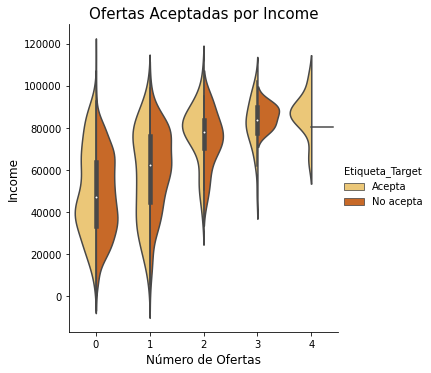

In [ ]:
plt.figure(figsize=(12,10))

sns.catplot(data=df_ofertas, kind='violin', x='NumOfertas', y='Income', hue='Etiqueta_Target', split='True', palette="YlOrBr")
plt.title('Ofertas Aceptadas por Income', fontsize=15)
plt.ylabel('Income', fontsize=12)
plt.xlabel('Número de Ofertas', fontsize=12)
plt.show()

**Número de Ofertas Aceptadas por grupo de edad**
<br>
</p>Los clientes de 40 a 55 concentra la mayor proporción que no ha acepatdo ofertas.

In [ ]:
print('Número de Ofertas Aceptadas, grupo de edad')
pd.crosstab(df2.NumOfertas, df2.GrupoEdad, margins=True, margins_name='Total')

Número de Ofertas Aceptadas, grupo de edad


GrupoEdad,25-39,40-55,56+,Total
NumOfertas,,,,
0,230,825,691,1746
1,41,126,154,321
2,14,37,30,81
3,10,22,12,44
4,3,2,6,11
Total,298,1012,893,2203


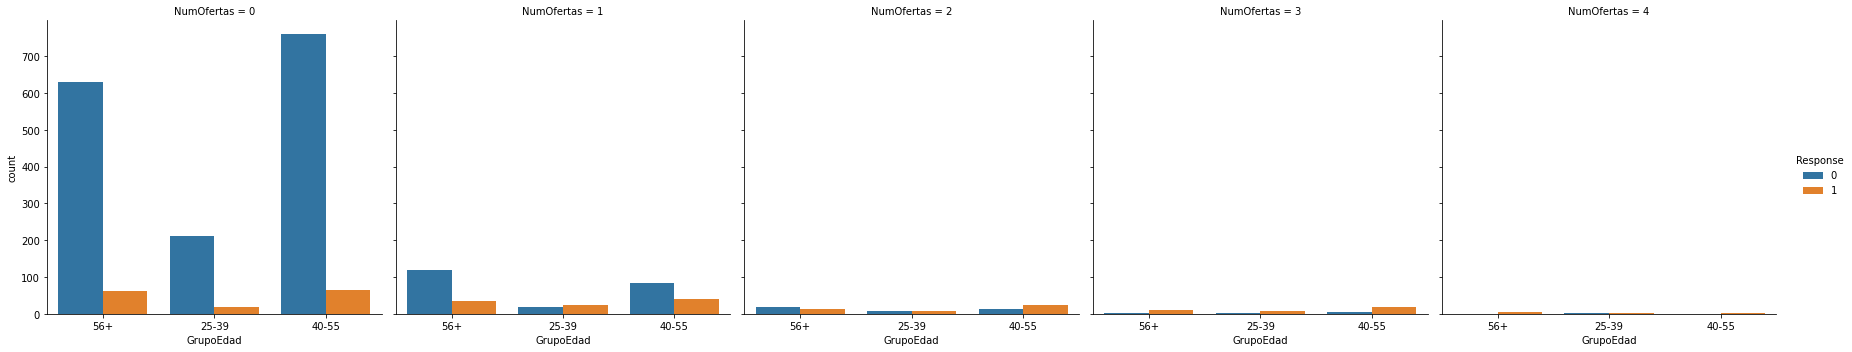

In [ ]:
sns.catplot(data=df2[['GrupoEdad','Response','NumOfertas']], x='GrupoEdad',hue='Response',col='NumOfertas',kind='count')

### 4.6 Otras Variables
<p/>NumWebVisitsMonth : número de visitas al sitio web de la empresa en el último mes
<br>
<p/>Complain : 1 si el cliente tuvo una queja en los últimos 2 años

In [ ]:
df_web=df2[['GrupoEdad','NumWebVisitsMonth','Response']]

def categoria(x):
  if x==1:
    return 'Acepta'
  if x==0:
    return 'No acepta'

df_web['Etiqueta_Target']=df2['Response'].apply(lambda x: categoria(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


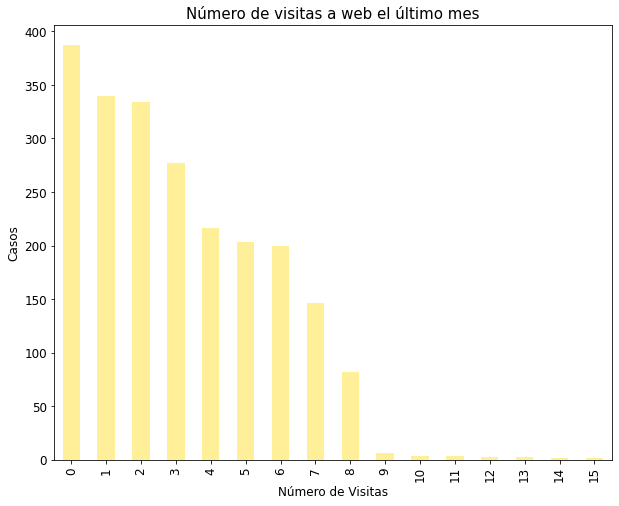

In [ ]:
plt.figure(figsize=(10,8))
df_web.NumWebVisitsMonth.value_counts().plot(kind='bar',color ='gold',alpha=0.4,use_index=False,grid=False, fontsize=12)
plt.title('Número de visitas a web el último mes', fontsize='15')
plt.ylabel('Casos', fontsize=12)
plt.xlabel('Número de Visitas', fontsize=12)

plt.show()

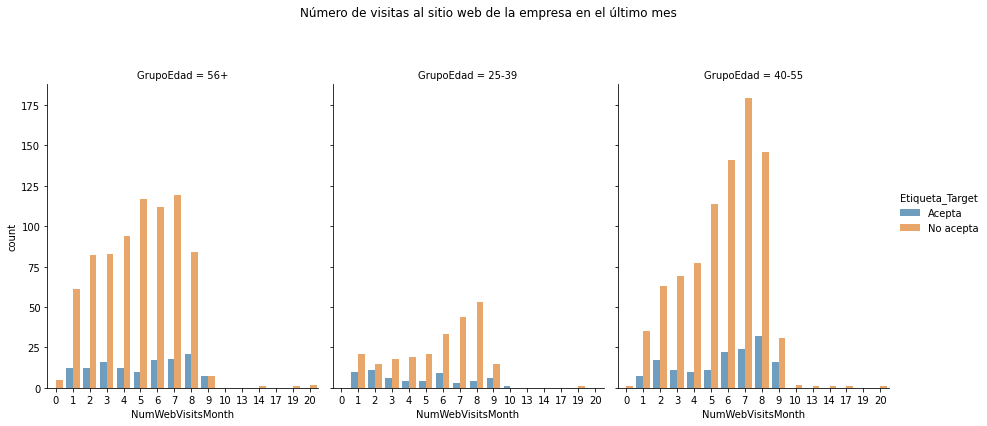

In [ ]:
graf_NumWebVisitsMonth= sns.catplot(x="NumWebVisitsMonth", hue="Etiqueta_Target", col="GrupoEdad", data=df_web, kind="count",height=6, aspect=.7,alpha=0.7)

graf_NumWebVisitsMonth.fig.subplots_adjust(top=0.8)

graf_NumWebVisitsMonth.fig.suptitle('Número de visitas al sitio web de la empresa en el último mes')

plt.show()

**Quejas en los ultimos dos años**
<br>
</p>Se han dado 20 casos, no será incluida en el análisis

In [ ]:
df_quejas=df2[['GrupoEdad','Complain','Response']]

def categoria(x):
  if x==1:
    return 'Acepta'
  if x==0:
    return 'No acepta'

df_quejas['Etiqueta_Target']=df2['Response'].apply(lambda x: categoria(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
def cat_queja(x):
  if x==1:
    return 'Queja'
  if x==0:
    return 'Sin queja'

df_quejas['Etiqueta_Queja']=df_quejas['Complain'].apply(lambda x: cat_queja(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


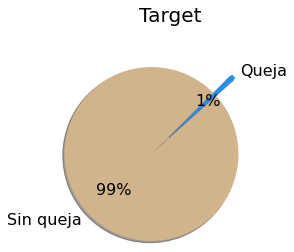

Casos:  Sin queja    2183
Queja          20
Name: Etiqueta_Queja, dtype: int64


In [ ]:
labels=df_quejas.Etiqueta_Queja.value_counts().index
sizes=df_quejas.Etiqueta_Queja.value_counts().values
explode = (0.3, 0)
colors = ['tan','dodgerblue']
plt.pie(sizes, explode=explode, labels=labels, autopct='%.0f%%',shadow=True, startangle=45, textprops = {'color': 'black','fontsize':16}, colors=colors)
plt.title('Target', fontsize='20')
plt.show()
print('Casos: ',df_quejas.Etiqueta_Queja.value_counts())

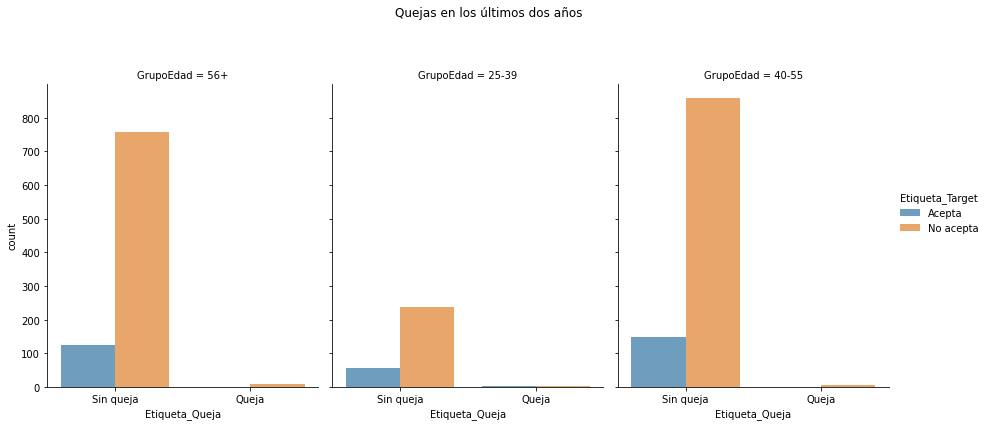

In [ ]:
graf_Complain= sns.catplot(x="Etiqueta_Queja", hue="Etiqueta_Target", col="GrupoEdad", data=df_quejas, kind="count",height=6, aspect=.7,alpha=0.7)
graf_Complain.fig.subplots_adjust(top=0.8)

graf_Complain.fig.suptitle('Quejas en los últimos dos años')
plt.show()

# 5.Desafío: Algoritmo Clasificación 1

Sobre el dataset del proyecto final, realizar la creación e implementación de un Árbol de Decisión de Clasificación.

###5.1Arbol de Clasificación

In [ ]:
#Comenzamos con la preparacion de nuestros datos
df_dummy = pd.get_dummies(df2,columns=['Education','Marital_Status'], drop_first=True)

#Separamos los datos de entrada de la salida
X = df_dummy.drop(['ID','Year_Birth','Dt_Customer','GrupoEdad','Complain','Response'],axis=1) #Elimino de mi dataset la variable a predecir(target) + Complain
y = df_dummy.Response #Defino el Target

from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

#Entrenamos el modelo
tree.fit(X_train, y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% accuracy train:', train_accuracy)
print('% accuracy test:',test_accuracy)

% accuracy train: 0.8625162127107653
% accuracy test: 0.8744326777609682


#### **Importancia Features: Arbol**

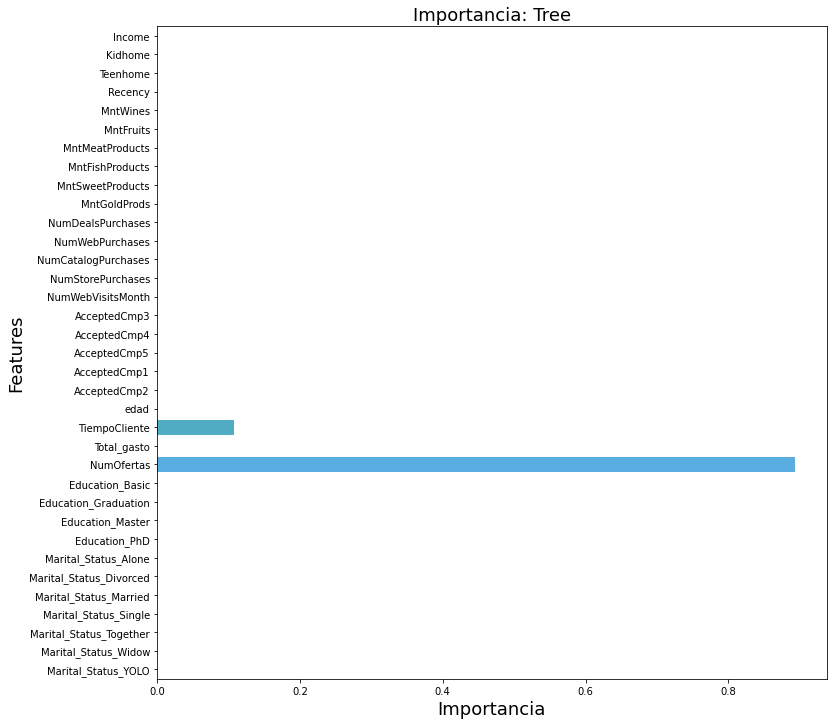

In [ ]:
plt.figure(figsize=(12,12))

importance_tree=tree.feature_importances_
col_import_tree=X.columns
sns.barplot(x=importance_tree,y=col_import_tree)

plt.title("Importancia: Tree", fontsize=18)
plt.ylabel("Features", fontsize=18)
plt.xlabel("Importancia", fontsize=18)

plt.show()


# 6.Desafío: Algoritmo Clasificación 2

Implementar al menos uno de los algoritmos de clasificación (KNN, Random Forest, Regresión Logística) con el dataset propuesto para el proyecto final del curso. 

### 6.1 Random Forest

In [ ]:
#Carga de las librerías
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Creamos un random forest
model_rf = RandomForestClassifier(random_state=42, n_estimators=200, max_features="log2")
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=200, random_state=42)

In [ ]:
#Prediccion en Test
y_test_pred = model_rf.predict(X_test) 

#Calculo el accuracy en Test
acc_rf = accuracy_score(y_test, y_test_pred)

print('Accuracy RF - Test:',acc_rf)

Accuracy RF - Test: 0.9046898638426626


#### **Importancia Features: Random Forest**

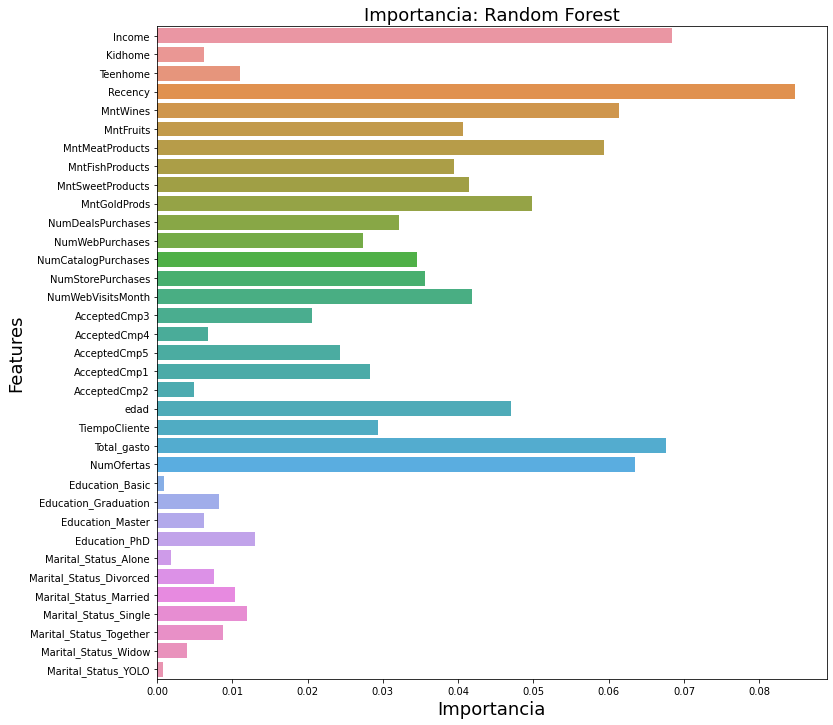

In [ ]:
plt.figure(figsize=(12,12))

importance_rf=model_rf.feature_importances_
col_import_rf=X.columns
sns.barplot(x=importance_rf,y=col_import_rf)

plt.title("Importancia: Random Forest", fontsize=18)
plt.ylabel("Features", fontsize=18)
plt.xlabel("Importancia", fontsize=18)

plt.show()

### 6.2 KNN

In [ ]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
prediccion = model_knn.predict(X_test)

In [ ]:
acc_knn = accuracy_score(y_test, prediccion)
print('Accuracy KNN Test:',acc_knn)

Accuracy KNN Test: 0.8335854765506808


**Comparacion Inicial Modelos**
<p/> (a) Se ha logrado un mayor accuracy con Random Forest (90%) Vs KNN (83.3%).

<p/> (b) No se se incluye "Complain" por concentrar la respuesta en un solo valor(sin queja).(Punto 7.4)

# 7.Metricas de Evaluación

In [ ]:
#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

# Random Forest
##############################################
model_rf = RandomForestClassifier(random_state=42, n_estimators=200,class_weight="balanced", max_features="log2")
model_rf.fit(X_train, y_train)

#Prediccion en Test
y_test_pred_rf = model_rf.predict(X_test) 

#Calculo el accuracy en Test
acc_rf = accuracy_score(y_test, y_test_pred)

#KNN
##############################################
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_test_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_test_pred_knn)

### 7.1Matriz de Confusión

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def Matriz_Confusion(y_pred):
  sns.set(font_scale=1.3)
  cm = confusion_matrix(y_test, y_pred)
  print(cm)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='YlOrBr')
  plt.grid(False)
  plt.show()

**Matriz Confución: Random Forest**

[[566   4]
 [ 60  31]]


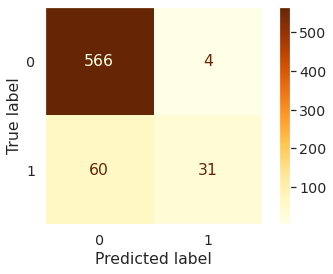

In [ ]:
Matriz_Confusion(y_test_pred_rf)

**Matriz Confución: Random KNN**

[[535  35]
 [ 75  16]]


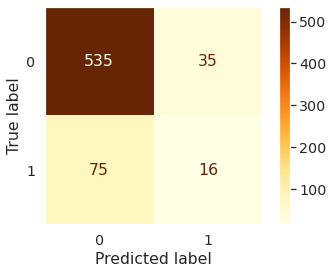

In [ ]:
Matriz_Confusion(y_test_pred_knn)

### 7.2 Métricas

#### Precision, Recall, F1_Score

In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef

def metricas(y_pred):
  met_acc = accuracy_score(y_test, y_pred)
  met_precision = precision_score(y_true=y_test, y_pred=y_pred)
  met_recall = recall_score(y_true=y_test, y_pred=y_pred)
  met_f1 = f1_score(y_true=y_test, y_pred=y_pred)
  
  return met_acc, met_precision ,  met_recall, met_f1

In [ ]:
met=pd.DataFrame({'Metricas':['Accuracy','Precision','Recall','F1_Score']})

metricas_RF=pd.DataFrame({'Modelo RF':metricas(y_test_pred_rf)})

metricas_KNN=pd.DataFrame({'Modelo KNN':metricas(y_test_pred_knn)})

In [ ]:
import pandas as pd
result = pd.concat([met,metricas_RF, metricas_KNN], axis=1, join="inner")

#### ROC

In [ ]:
from sklearn.metrics import roc_curve, auc

model_rf = RandomForestClassifier(random_state=42, n_estimators=200,class_weight="balanced", max_features="log2")
model_rf.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Random Forest
##############################################
classifier=model_rf
class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc_rf = auc(fpr, tpr)
print(roc_auc_rf)
#KNN
##############################################
classifier=knn
class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc_knn = auc(fpr, tpr)
print(roc_auc_knn)

0.8940138808559861
0.6443705417389627


#### Consolida Métricas para comparación

In [ ]:
result = pd.concat([met,metricas_RF, metricas_KNN], axis=1, join="inner")
met_ROC = {'Metricas':'ROC','Modelo RF':[roc_auc_rf],'Modelo KNN':[roc_auc_knn] }

result = result.append(pd.DataFrame(met_ROC), ignore_index=True)

result

,Metricas,Modelo RF,Modelo KNN
0,Accuracy,0.903177,0.833585
1,Precision,0.885714,0.313725
2,Recall,0.340659,0.175824
3,F1_Score,0.492063,0.225352
4,ROC,0.894014,0.644371


**Comparacion ROC, Area Bajo la Curva**

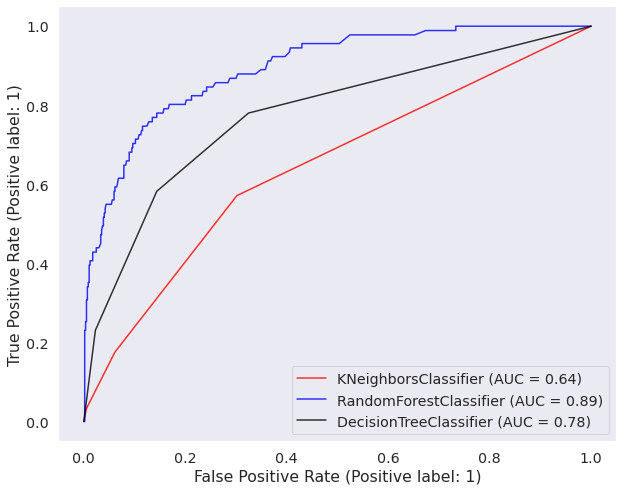

In [ ]:
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(10,8))
ax = plt.gca()
knn_disp = RocCurveDisplay.from_estimator(model_knn, X_test, y_test,alpha=0.8, color='red',ax=ax)
rf_disp = RocCurveDisplay.from_estimator(model_rf, X_test, y_test,alpha=0.8, color='blue',ax=ax)

tree_disp = RocCurveDisplay.from_estimator(tree, X_test, y_test,alpha=0.8, color='black',ax=ax)

plt.grid(False)
plt.show()

####Primer Resultado:

</p> Mejor modelo: Random Forest
</p> A pesar de tener valores altor de AUC, tiene valores bajos en otras métricas (F1_score, Recall)
</p> Se buscara mejorar los resultados a partir de aplicar tunning

### 7.4 Tunning

#### <p/>Por los ejericios anteriores, se observa que "Complain" tiene una importancia minima y será eliminado.

#### <p/> Por la eliminación, se recalcula X_train, y_train

#### <p/> Se probaron metricas de precision y accuracy pero no son muy efectivas de forma asilada. Se considera como métricas de evalaución el accuracy y el f1_score.

In [ ]:
#Comenzamos con la preparacion de nuestros datos
df_dummy = pd.get_dummies(df2,columns=['Education','Marital_Status'], drop_first=True)

#Separamos los datos de entrada de la salida: Se incluye elimninar Complain
X = df_dummy.drop(['ID','Year_Birth','Dt_Customer','GrupoEdad','Response','Complain','NumOfertas'],axis=1) #Elimino de mi dataset 'Complain'
y = df_dummy.Response #Defino el Target

from sklearn.model_selection import train_test_split #libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

####Random Forest




In [ ]:
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer

g_rf=GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                  
                  
                  #Parametros
                  param_grid = {
                              'max_features': [3,4,5,6],
                              'n_estimators': [50,100,200,250 ,300,350],
                              'criterion':('gini','entropy')
                          },                 
                  #Metrica
                  scoring='accuracy',

                  # Numero de grupos para cv
                  cv=5,
                  
                  n_jobs=-1                  
                  )

In [ ]:
gs_rf=g_rf.fit(X_train, y_train)

In [ ]:
#Accuracy
gs_rf.best_params_

{'criterion': 'entropy', 'max_features': 5, 'n_estimators': 200}

In [ ]:
model_rf_GSearch = RandomForestClassifier(random_state=42, n_estimators=200, max_features=5,criterion='entropy')
model_rf_GSearch.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=200,
                       random_state=42)

In [ ]:
#Accuracy
print("Accuracy training tunning: {:.2f}%".format(gs_rf.best_score_ *100))

Accuracy training tunning: 86.64%


In [ ]:
from sklearn.metrics import f1_score, accuracy_score

y_test_gridRF=model_rf_GSearch.predict(X_test) 

print("accuracy_score testing tuning: {:.2f}%".format(accuracy_score(y_test,y_test_gridRF)*100) )
print("F1_Score testing tuning: {:.2f}%".format(f1_score(y_test,y_test_gridRF)*100) )

accuracy_score testing tuning: 90.62%
F1_Score testing tuning: 52.31%


[[565   5]
 [ 57  34]]


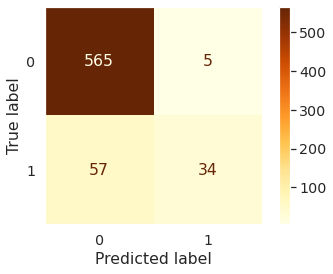

In [ ]:
Matriz_Confusion(y_test_gridRF)

plt.show()

#### KNN

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

pipe_knn = Pipeline([('scaler',StandardScaler()),('knn',KNeighborsClassifier())])

k_range = list(range(3, 30))

g_knn=GridSearchCV(estimator=pipe_knn,
                  
                  #Parametros
                  param_grid = dict(knn__n_neighbors=k_range),

                  #Metrica
                  scoring='accuracy', # accuracy/precision fueron descartados

                  # Numero de grupos para cv
                  cv=5,
                  
                  n_jobs=-1

                    )

In [ ]:
gs_knn=g_knn.fit(X_train, y_train)

In [ ]:
#Accuracy
gs_knn.best_params_

{'knn__n_neighbors': 10}

In [ ]:
print("Accuracy training tunning: {:.2f}%".format(gs_knn.best_score_ *100) )

Accuracy training tunning: 86.19%


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

y_test_gridKnn=knn.predict(X_test) 

print("accuracy_score testing tuning: {:.2f}%".format(accuracy_score(y_test,y_test_gridKnn)*100) )
print("F1_Score testing tuning: {:.2f}%".format(f1_score(y_test,y_test_gridKnn)*100) )

accuracy_score testing tuning: 86.54%
F1_Score testing tuning: 11.88%


[[566   4]
 [ 85   6]]


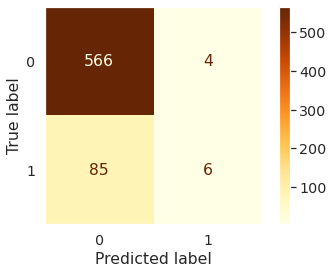

In [ ]:
Matriz_Confusion(y_test_gridKnn)

#### SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=42))

scorer = make_scorer(f1_score, pos_label=0)

c_gamma_range = [1,5,10,11,12,13]

param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

g_svm = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=5,
                  n_jobs=-1)

In [ ]:
gs_svm = g_svm.fit(X_train, y_train)

In [ ]:
gs_svm.best_params_

{'svc__C': 5, 'svc__kernel': 'linear'}

In [ ]:
print("F1_score training tunning: {:.2f}%".format(gs_svm.best_score_ *100) )

F1_score training tunning: 93.31%


In [ ]:
from sklearn.metrics import f1_score, accuracy_score
modelo_svm = SVC(C=5, kernel='linear')

modelo_svm.fit(X_train, y_train)

y_test_gridSVM=modelo_svm.predict(X_test) 

print("accuracy_score testing tuning: {:.2f}%".format(accuracy_score(y_test,y_test_gridSVM)*100))
print("F1_score testing tuning: {:.2f}%".format(f1_score(y_test,y_test_gridSVM)*100))

accuracy_score testing tuning: 86.54%
F1_score testing tuning: 21.24%


[[560  10]
 [ 79  12]]


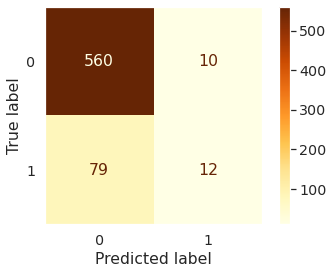

In [ ]:
Matriz_Confusion(y_test_gridSVM)

**Comparacion ROC, Area Bajo la Curva**

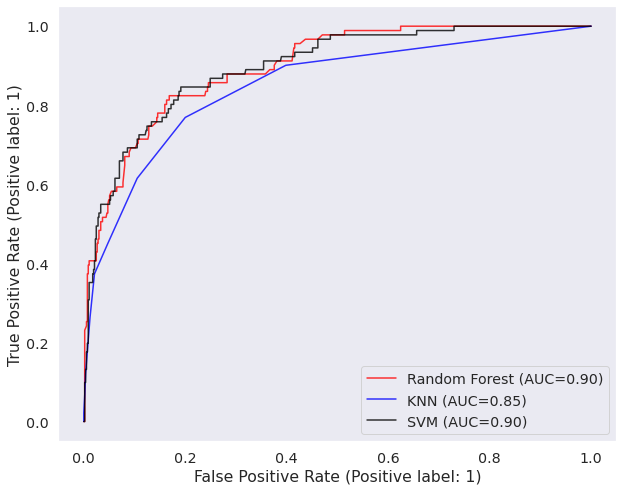

In [ ]:
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(10,8))

ax = plt.gca()

rf_dispGSearch = RocCurveDisplay.from_estimator(gs_rf, X_test, y_test,alpha=0.8, color='red',ax=ax, label='Random Forest (AUC=0.90)')

knn_dispGSearch = RocCurveDisplay.from_estimator(gs_knn, X_test, y_test,alpha=0.8, color='blue',ax=ax, label='KNN (AUC=0.85)')

svm_dispGSearch = RocCurveDisplay.from_estimator(gs_svm, X_test, y_test,alpha=0.8, color='black',ax=ax, label='SVM (AUC=0.90)')

plt.grid(False)
plt.show()

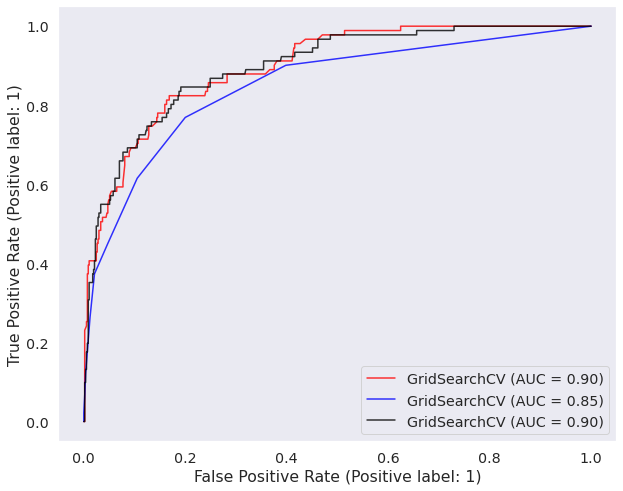

In [ ]:
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(10,8))

ax = plt.gca()

rf_dispGSearch = RocCurveDisplay.from_estimator(gs_rf, X_test, y_test,alpha=0.8, color='red',ax=ax)

knn_dispGSearch = RocCurveDisplay.from_estimator(gs_knn, X_test, y_test,alpha=0.8, color='blue',ax=ax)

svm_dispGSearch = RocCurveDisplay.from_estimator(gs_svm, X_test, y_test,alpha=0.8, color='black',ax=ax)

plt.grid(False)
plt.show()

####Segundo Resultado: Tunning

</p> Mejor modelo: Random Forest o SVM
</p> A pesar de tener valores altor de AUC, tiene valores bajos en otras métricas (F1_score, Recall)
</p> Se buscara mejorar los resultados a partir de aplicar Balanceo de Clases

##7.5 Balanceo de Clases

*   De todos los modelos revisados, se obtienen resultados de bajo rendimiento en la detección de la clase minoritaria.
<br>
<br>
* Se observa que a pesar de la optimización de los hiperparámetros, no se obtiene una clasficacion adecuada en test (la mayoría de las técnicas de aprendizaje automático no son capaces de detectar correctamente principalmente los "Falsos Positivos" (en el jupyter solo se muestra solo los casos más destacados).
<br>
<br>
* Además se ha realizado una revisión de los features y se han eliminado casos y variables irrelevantes pero el problema mencionado persiste.
<br>
<br>
* El problema comentado se presenta por el desbalance notorio de la clases (target objetivo=15% Vs Caso contrario), por lo que se propone trabajar con una clasificación más equilibrada.
<br>
<br>
* Un enfoque para abordar un conjuntos de datos desequilibrados es sobremuestrear la clase minoritaria. El enfoque más simple consiste en duplicar ejemplos en la clase minoritaria, aunque estos ejemplos no agregan ninguna información nueva al modelo. 
<br>
<br>
*Otra alternativa es sintetizar nuevos casos a partir de los ejemplos existentes. Este es un tipo de aumento de datos para la clase minoritaria y se conoce como Técnica de Sobremuestreo de Minorías sintéticas (SMOTE).

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Construcción de Balanceo

#####**Target inicial: Desbalanceado**

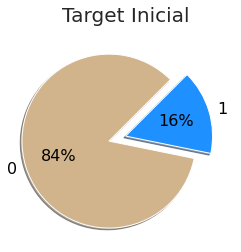

In [ ]:
labels=y_train.value_counts().index
sizes=y_train.value_counts().values
explode = (0.2, 0)
colors = ['tan','dodgerblue']
plt.pie(sizes, explode=explode, labels=labels, autopct='%.0f%%',shadow=True, startangle=45, textprops = {'color': 'black','fontsize':16}, colors=colors)
plt.title('Target Inicial', fontsize='20')
plt.show()

#####**Target Final: Balanceado**

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
X_train_Smote, y_train_Smote = oversample.fit_resample(X_train, y_train)

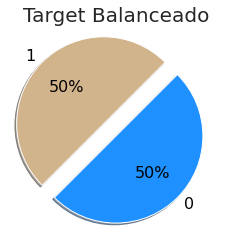

In [ ]:
labels=y_train_Smote.value_counts().index
sizes=y_train_Smote.value_counts().values
explode = (0.2, 0)
colors = ['tan','dodgerblue']
plt.pie(sizes, explode=explode, labels=labels, autopct='%.0f%%',shadow=True, startangle=45, textprops = {'color': 'black','fontsize':16}, colors=colors)
plt.title('Target Balanceado', fontsize='20')
plt.show()

###KNN Balanceado

In [ ]:
gs_knnSmote=g_knn.fit(X_train_Smote, y_train_Smote)

In [ ]:
gs_knnSmote.best_params_

{'knn__n_neighbors': 4}

**Knn= 3 o 5**

Segun el ajuste de knn por desbalanceo se obtiene k=4, como es un número par no es adecuado para la elección KNN por lo que elige los valores impares más cercanos. Los mejores resultados en F1_score y la matriz de confución se obtiene con k=5.





In [ ]:
from sklearn.metrics import f1_score, accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_Smote, y_train_Smote)

y_test_gridKnn_Smote=knn.predict(X_test) 

print("accuracy_score testing tuning: {:.3f}%".format(accuracy_score(y_test,y_test_gridKnn_Smote)*100) )
print("F1_Score testing tuning: {:.3f}%".format(f1_score(y_test,y_test_gridKnn_Smote)*100) )

accuracy_score testing tuning: 71.558%
F1_Score testing tuning: 29.851%


[[433 137]
 [ 51  40]]


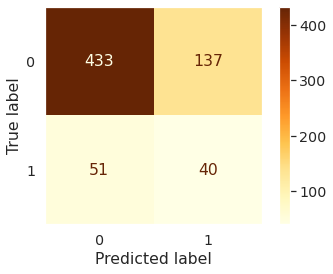

In [ ]:
Matriz_Confusion(y_test_gridKnn_Smote)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_Smote, y_train_Smote)

y_test_gridKnn_Smote=knn.predict(X_test) 

print("accuracy_score testing tuning: {:.3f}%".format(accuracy_score(y_test,y_test_gridKnn_Smote)*100) )
print("F1_Score testing tuning: {:.3f}%".format(f1_score(y_test,y_test_gridKnn_Smote)*100) )

accuracy_score testing tuning: 71.256%
F1_Score testing tuning: 33.566%


[[423 147]
 [ 43  48]]


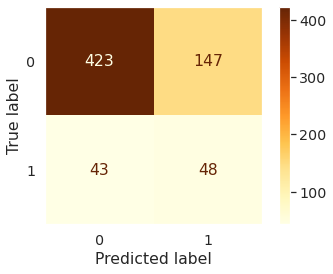

In [ ]:
Matriz_Confusion(y_test_gridKnn_Smote)

###RF Balanceado

In [ ]:
gs_RFSmote=g_rf.fit(X_train_Smote, y_train_Smote)

In [ ]:
gs_RFSmote.best_params_

{'criterion': 'gini', 'max_features': 3, 'n_estimators': 50}

In [ ]:
model_rf_GSearch_SMOTE = RandomForestClassifier(random_state=42, n_estimators=50, max_features=3,criterion='gini')
model_rf_GSearch_SMOTE.fit(X_train_Smote, y_train_Smote)

RandomForestClassifier(max_features=3, n_estimators=50, random_state=42)

In [ ]:
#Accuracy
print("Accuracy training tunning: {:.2f}%".format(gs_RFSmote.best_score_ *100) )

Accuracy training tunning: 92.08%


In [ ]:
from sklearn.metrics import f1_score, accuracy_score

y_test_gridRF_SMOTE=model_rf_GSearch_SMOTE.predict(X_test) 

print("accuracy_score testing tuning: {:.2f}%".format(accuracy_score(y_test,y_test_gridRF_SMOTE)*100) )
print("F1_Score testing tuning: {:.2f}%".format(f1_score(y_test,y_test_gridRF_SMOTE)*100) )

accuracy_score testing tuning: 88.50%
F1_Score testing tuning: 53.09%


[[542  28]
 [ 48  43]]


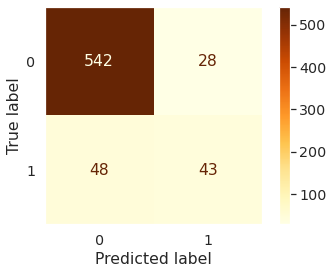

In [ ]:
Matriz_Confusion(y_test_gridRF_SMOTE)

###SVM Balanceado

In [ ]:
gs_svmSMOTE=g_svm.fit(X_train_Smote, y_train_Smote)

In [ ]:
gs_svmSMOTE.best_params_

{'svc__C': 1, 'svc__kernel': 'linear'}

In [ ]:
print("F1_score training tunning: {:.2f}%".format(gs_svmSMOTE.best_score_ *100) )

F1_score training tunning: 88.31%


In [ ]:
from sklearn.metrics import f1_score, accuracy_score
modelo_svm_GSearch_SMOTE = SVC(C=1, kernel='linear')

modelo_svm_GSearch_SMOTE.fit(X_train_Smote, y_train_Smote)

y_test_gridSVM_SMOTE=modelo_svm_GSearch_SMOTE.predict(X_test) 

print("accuracy_score testing tuning: {:.2f}%".format(accuracy_score(y_test,y_test_gridSVM_SMOTE)*100))
print("F1_score testing tuning: {:.2f}%".format(f1_score(y_test,y_test_gridSVM_SMOTE)*100))

accuracy_score testing tuning: 75.19%
F1_score testing tuning: 43.06%


[[435 135]
 [ 29  62]]


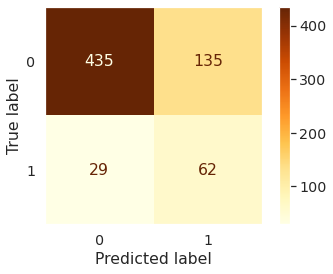

In [ ]:
Matriz_Confusion(y_test_gridSVM_SMOTE)

**Comparacion ROC, Area Bajo la Curva**

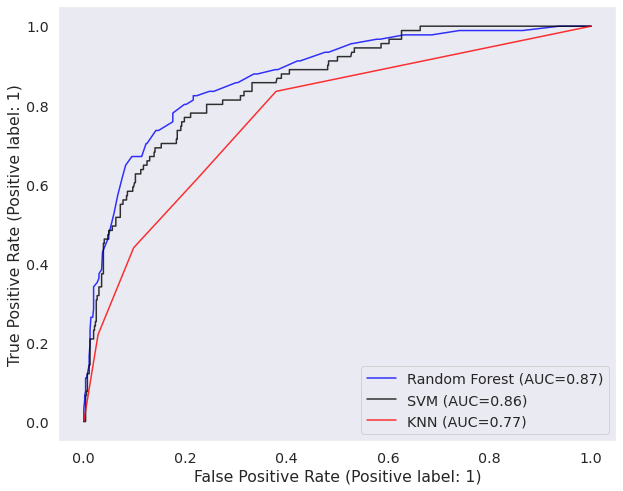

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score 
plt.figure(figsize=(10,8))

ax = plt.gca()

rf_dispGSearch_SMOTE = RocCurveDisplay.from_estimator(gs_RFSmote, X_test, y_test,alpha=0.8, color='blue',ax=ax,label='Random Forest (AUC=0.87)')
svm_dispGSearch_SMOTE = RocCurveDisplay.from_estimator(gs_svmSMOTE, X_test, y_test,alpha=0.8, color='black',ax=ax,label='SVM (AUC=0.86)')
knn_dispGSearch_SMOTE = RocCurveDisplay.from_estimator(gs_knnSmote, X_test, y_test,alpha=0.8, color='red',ax=ax, label='KNN (AUC=0.77)')

plt.grid(False)
plt.show()

###XGBClassifier Desbalanceado

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

bmodel=RandomForestClassifier(random_state=42)

g_abc=GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
                  #Parametros
                  param_grid = {
                 'n_estimators':[50,100,150,200,250],
                  'learning_rate':[0.3,0.4,0.5]
                                },                 
                  #Metrica
                  scoring='f1',

                  # Numero de grupos para cv
                  cv=5,
                  
                  n_jobs=-1                  
                  )		

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

bmodel=RandomForestClassifier(random_state=42)

bosting = AdaBoostClassifier(base_estimator=bmodel)

pipe_adc = Pipeline([('scaler',StandardScaler()),
                     ('abc', bosting)])

g_adc = GridSearchCV(
                  
                  estimator=pipe_adc,
                  
                  #Parametros
                  param_grid = {
                 'abc__n_estimators':[5,10,20],
                  'abc__learning_rate':[0.0001, 0.001, 0.01]
                                },                 
                  #Metrica
                  scoring='f1',

                  # Numero de grupos para cv
                  cv=5,
                  
                  n_jobs=-1                  
                  )		

In [ ]:
gs_adc = g_adc.fit(X_train, y_train)

In [ ]:
gs_adc.best_params_

{'abc__learning_rate': 0.0001, 'abc__n_estimators': 10}

In [ ]:
print("F1_score training tunning: {:.2f}%".format(gs_adc.best_score_ *100) )


from sklearn.metrics import f1_score, accuracy_score

modelo_adc=AdaBoostClassifier(base_estimator=bmodel, n_estimators=5,learning_rate=0.0001)

modelo_adc.fit(X_train, y_train)

y_test_gridAdc=modelo_adc.predict(X_test) 

print("accuracy_score testing tuning: {:.2f}%".format(accuracy_score(y_test,y_test_gridAdc)*100))
print("F1_score testing tuning: {:.2f}%".format(f1_score(y_test,y_test_gridAdc)*100))
				  

F1_score training tunning: 38.80%
accuracy_score testing tuning: 90.47%
F1_score testing tuning: 51.91%


[[564   6]
 [ 57  34]]


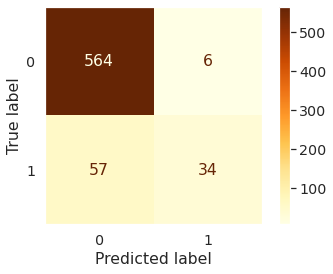

In [ ]:
Matriz_Confusion(y_test_gridAdc)	

###XGBClassifier Balanceado

In [ ]:
gs_AdcSMOTE=g_adc.fit(X_train_Smote, y_train_Smote)

In [ ]:
gs_AdcSMOTE.best_params_

{'abc__learning_rate': 0.01, 'abc__n_estimators': 20}

In [ ]:
print("F1_score training tunning: {:.2f}%".format(gs_AdcSMOTE.best_score_ *100) )

from sklearn.metrics import f1_score, accuracy_score

modelo_adc_SMOTE=AdaBoostClassifier(base_estimator=bmodel, n_estimators=20,learning_rate=0.01)

modelo_adc_SMOTE.fit(X_train, y_train)

y_test_gridAdc_SMOTE=modelo_adc_SMOTE.predict(X_test) 

print("accuracy_score testing tuning: {:.2f}%".format(accuracy_score(y_test,y_test_gridAdc_SMOTE)*100))
print("F1_score testing tuning: {:.2f}%".format(f1_score(y_test,y_test_gridAdc_SMOTE)*100))
				  

F1_score training tunning: 91.38%
accuracy_score testing tuning: 90.32%
F1_score testing tuning: 50.77%


[[564   6]
 [ 58  33]]


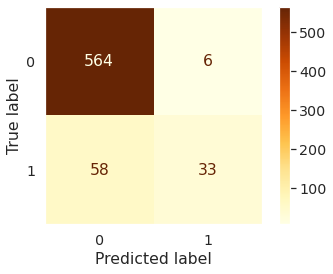

In [ ]:
Matriz_Confusion(y_test_gridAdc_SMOTE)

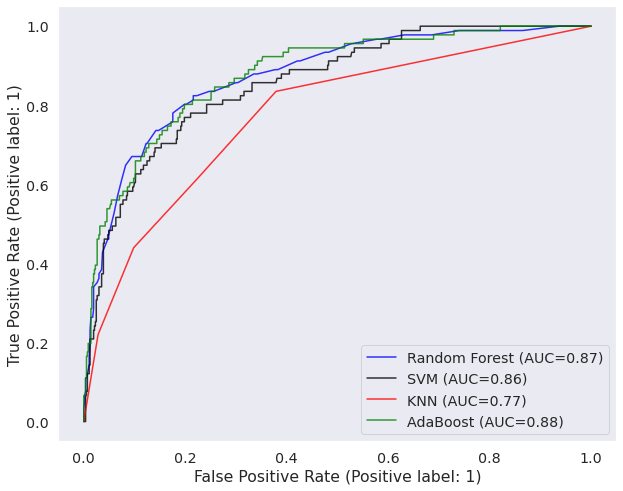

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score 
plt.figure(figsize=(10,8))

ax = plt.gca()

rf_dispGSearch_SMOTE = RocCurveDisplay.from_estimator(gs_RFSmote, X_test, y_test,alpha=0.8, color='blue',ax=ax,label='Random Forest (AUC=0.87)')
svm_dispGSearch_SMOTE = RocCurveDisplay.from_estimator(gs_svmSMOTE, X_test, y_test,alpha=0.8, color='black',ax=ax,label='SVM (AUC=0.86)')
knn_dispGSearch_SMOTE = RocCurveDisplay.from_estimator(gs_knnSmote, X_test, y_test,alpha=0.8, color='red',ax=ax, label='KNN (AUC=0.77)')

Adc_dispGSearch_SMOTE = RocCurveDisplay.from_estimator(gs_AdcSMOTE, X_test, y_test,alpha=0.8, color='green',ax=ax, label='AdaBoost (AUC=0.88)')

plt.grid(False)
plt.show()

###Tercer Resultado

</p> Mejor modelo: Random Forest
</p> Valor aceptable de AUC=0.87, y mayores valores de F1_score (53.09%)
</p> Se ha conseguido reducir de forma considerable los falsos positivos

# 8.Conclusiones

#### Clase Predict

In [ ]:
Clase_Final=pd.DataFrame(gs_RFSmote.predict(X_test), columns = ['Clase_Final'])

In [ ]:
df_testFinal=pd.concat([X_test,Clase_Final],axis=1, join='inner')

#### Demograficas

In [ ]:
# Generación ID para Merge
df2_res=df2[['Education','Marital_Status']]
df2_res.index.names = ['ID']
df2_res.reset_index(inplace=True)
df2_res.head()

,ID,Education,Marital_Status
0,0,Graduation,Single
1,1,Graduation,Single
2,2,Graduation,Together
3,3,Graduation,Together
4,4,PhD,Married


In [ ]:
# Generación ID para Merge
df_testFinal.index.names = ['ID']
df_testFinal.reset_index(inplace=True)
df_testFinal.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Clase_Final
0,599,31089.0,1,0,57,31,3,31,2,8,...,0,0,0,0,0,0,1,0,0,0
1,367,31615.0,1,0,82,2,3,20,6,11,...,0,0,0,1,0,0,0,0,0,0
2,489,28457.0,0,0,96,24,1,108,29,29,...,0,0,0,0,0,0,0,1,0,0
3,640,63381.0,0,1,78,571,50,142,33,50,...,0,0,0,0,0,0,1,0,0,0
4,463,80124.0,0,0,47,483,84,398,205,84,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_testFinal=pd.merge(df_testFinal,df2_res, how='left', on='ID')
df_testFinal.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Clase_Final,Education,Marital_Status
0,599,31089.0,1,0,57,31,3,31,2,8,...,0,0,0,0,1,0,0,0,Graduation,Together
1,367,31615.0,1,0,82,2,3,20,6,11,...,0,1,0,0,0,0,0,0,Graduation,Divorced
2,489,28457.0,0,0,96,24,1,108,29,29,...,0,0,0,0,0,1,0,0,2n Cycle,Widow
3,640,63381.0,0,1,78,571,50,142,33,50,...,0,0,0,0,1,0,0,0,Graduation,Together
4,463,80124.0,0,0,47,483,84,398,205,84,...,0,0,1,0,0,0,0,0,Graduation,Married


In [ ]:
# Grupos de Edad
def grupo_edad(x):
  if x<18:
    return "Menor a 18"  
  elif x>=18 and x<=24:
    return "18-24"
  elif x>=25 and x<=39:
    return "25-39"
  elif x>=40 and x<=55:
    return "40-55"
  elif x>=56:
    return "56+"
  else:
    return "Otro caso"

df_testFinal.loc[:,['GrupoEdad']] = df_testFinal.edad.apply(lambda x: grupo_edad(x))

In [ ]:
def categoria(x):
  if x==1:
    return 'Acepta'
  if x==0:
    return 'No acepta'

df_testFinal.loc[:,['Etiqueta_Target']]=df_testFinal.Clase_Final.apply(lambda x: categoria(x))

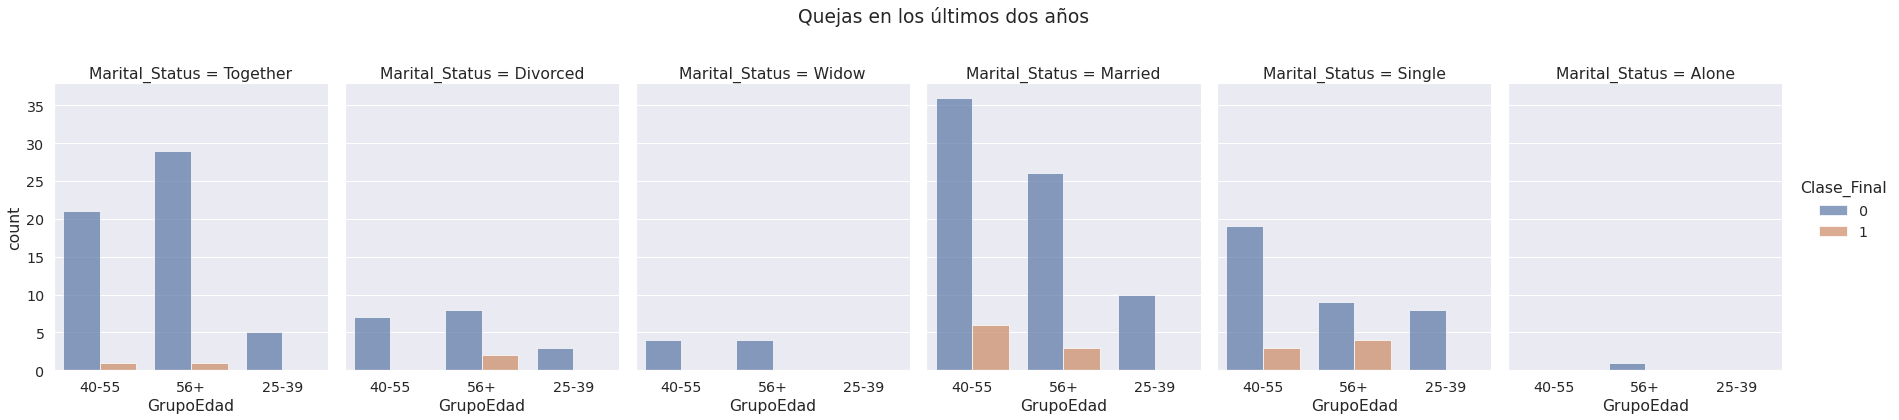

In [ ]:
graf_demo= sns.catplot(x="GrupoEdad", hue="Clase_Final", col="Marital_Status", data=df_testFinal, kind="count",height=6, aspect=.7,alpha=0.7)
graf_demo.fig.subplots_adjust(top=0.8)

graf_demo.fig.suptitle('Quejas en los últimos dos años')
plt.show()

#### Gasto

In [ ]:
df_testFinal['Total_gasto']=df_testFinal[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

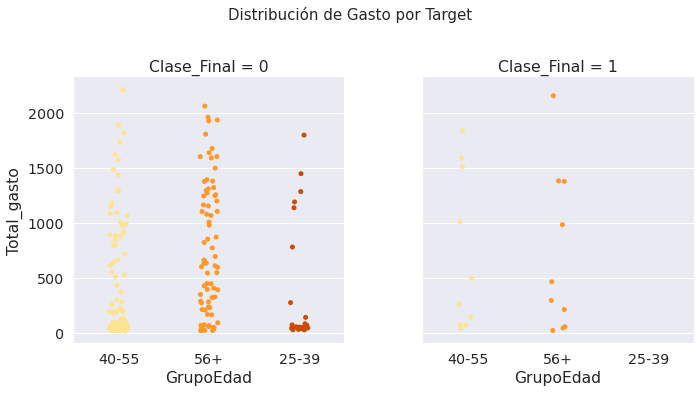

In [ ]:
sns.catplot(x="GrupoEdad", y="Total_gasto",col="Clase_Final", data=df_testFinal, palette='YlOrBr',sharey=True)
plt.suptitle('Distribución de Gasto por Target',y=1.1,fontsize=15)
plt.tight_layout(w_pad=5)
plt.show()

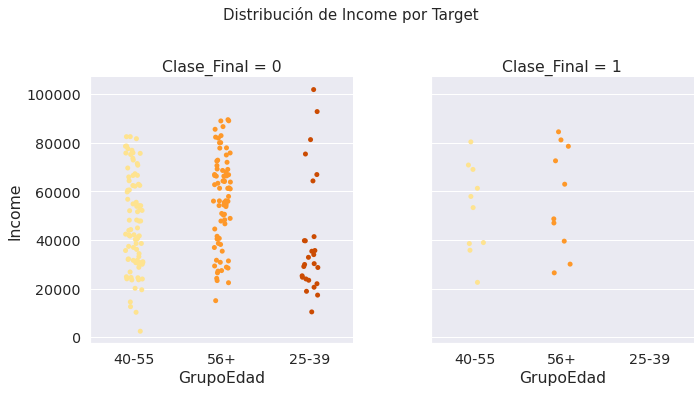

In [ ]:
sns.catplot(x="GrupoEdad", y="Income",col="Clase_Final", data=df_testFinal, palette='YlOrBr',sharey=True)
plt.suptitle('Distribución de Income por Target',y=1.1,fontsize=15)
plt.tight_layout(w_pad=5)
plt.show()

A partir del modelo, se observa que no hay diferencias considerables para la aceptación de campañas para los mayores grupos de edad por lo que se recomienda enfocar las campañas para los mayores grupos de edad (de 40 a más).

In [ ]:
df_testFinal.groupby(['Clase_Final','GrupoEdad'])['GrupoEdad'].count()

Clase_Final  GrupoEdad
0            25-39        26
             40-55        87
             56+          77
1            40-55        10
             56+          10
Name: GrupoEdad, dtype: int64

In [ ]:
pd.crosstab(df_testFinal.Clase_Final,df_testFinal.GrupoEdad, margins=True,margins_name = "Total")

GrupoEdad,25-39,40-55,56+,Total
Clase_Final,,,,
0,26,87,77,190
1,0,10,10,20
Total,26,97,87,210


In [ ]:
pd.crosstab(index=df_testFinal['Clase_Final'], columns=df_testFinal['GrupoEdad'],margins=True,margins_name = "Total").apply(lambda r: r/len(df_testFinal) *100,axis=1)

GrupoEdad,25-39,40-55,56+,Total
Clase_Final,,,,
0,12.380952,41.428571,36.666667,90.47619
1,0.000000,4.761905,4.761905,9.52381
Total,12.380952,46.190476,41.428571,100.00000


Además la nayor parte de clientes que aceptarían una nueva campaña tienen en promedio 9 años

In [ ]:
df_testFinal.groupby(['Clase_Final','TiempoCliente'])['TiempoCliente'].count()

Clase_Final  TiempoCliente
0            8                44
             9                92
             10               54
1            8                 3
             9                13
             10                4
Name: TiempoCliente, dtype: int64

In [ ]:
pd.crosstab(df_testFinal.Clase_Final,df_testFinal.TiempoCliente, margins=True,margins_name = "Total")

TiempoCliente,8,9,10,Total
Clase_Final,,,,
0,44,92,54,190
1,3,13,4,20
Total,47,105,58,210


In [ ]:
pd.crosstab(index=df_testFinal['Clase_Final'], columns=df_testFinal['TiempoCliente'],margins=True,margins_name = "Total").apply(lambda r: r/len(df_testFinal) *100,axis=1)

TiempoCliente,8,9,10,Total
Clase_Final,,,,
0,20.952381,43.809524,25.714286,90.47619
1,1.428571,6.190476,1.904762,9.52381
Total,22.380952,50.000000,27.619048,100.00000
